# CEGE0004: Assignment 1

# Model Ensembles

In this notebook ensembles models is implemented by scikit-learn.

## The Dataset

The [Default of credit card clients Data Set](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) we work with is from UCI repositry.

## Methodology

Supervised learning tasks are performed on the dataset using Python, specifically for classification with a model ensemble that combines decision trees, instance-based learning, Bayesian learning, and neural networks. The performance are also compare of three different ensemble methods: bagging, boosting, and stacking. 

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import pickle
from sklearn.linear_model import LogisticRegression

C:\Users\HAN\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load data 
X_train = pd.read_csv("x_train.csv")
X_test = pd.read_csv("x_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")


In [3]:
# Processing data
X_train = X_train.replace({'EDUCATION':{0:4, 5:4, 6:4}})
X_train = X_train.replace({'PAY_0':{-2:-1, 0:-1}})
X_train = X_train.replace({'PAY_2':{-2:-1, 0:-1}})
X_train = X_train.replace({'PAY_3':{-2:-1, 0:-1}})
X_train = X_train.replace({'PAY_4':{-2:-1, 0:-1}})
X_train = X_train.replace({'PAY_5':{-2:-1, 0:-1}})
X_train = X_train.replace({'PAY_6':{-2:-1, 0:-1}})

X_test = X_test.replace({'EDUCATION':{0:4, 5:4, 6:4}})
X_test = X_test.replace({'PAY_0':{-2:-1, 0:-1}})
X_test = X_test.replace({'PAY_2':{-2:-1, 0:-1}})
X_test = X_test.replace({'PAY_3':{-2:-1, 0:-1}})
X_test = X_test.replace({'PAY_4':{-2:-1, 0:-1}})
X_test = X_test.replace({'PAY_5':{-2:-1, 0:-1}})
X_test = X_test.replace({'PAY_6':{-2:-1, 0:-1}})

# Dummy variables
X_train = pd.get_dummies(X_train, columns=['SEX', 'EDUCATION'])
X_test = pd.get_dummies(X_test, columns=['SEX', 'EDUCATION'])

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)


# def add_suffix(col_name, suffix):
#     return col_name + '_' + str(suffix)

# data.columns = data.columns.to_series().apply(lambda x: add_suffix(x.split('_')[0], x.split('_')[1]))
# print(data.head())

## Load models
Now, we will use pickle to load the model that you have already written in other Jupyter files.

In [4]:
# Load saved models:
with open("DecisionTree.sav", "rb") as f:
    decision_tree = pickle.load(f)

with open("Instance_based.sav", "rb") as f:
    instance_based_learning  = pickle.load(f)

with open("gaussion_nb.sav", "rb") as f:
    bayesian_learning  = pickle.load(f)

# neural_network = torch.load('neural_network.pth',map_location=torch.device('cpu'))

with open("MLP_sklearn.sav", "rb") as f:
    neural_network  = pickle.load(f)

## Bagging 
Next, we will implement Bagging integration method and show the accuracy.

In [5]:
# Create the Bagging ensemble
bagging_classifier = BaggingClassifier(
    estimator=decision_tree,
    max_samples=2, 
    max_features=1.0
)

bagging_classifier.fit(X_train, y_train)

bagging_y_pred = bagging_classifier.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_y_pred)
print(f'Bagging accuracy: {bagging_accuracy:.4f}')

Bagging accuracy: 0.7838


## AdaBoosting 
Next, we will implement AdaBoosting integration method and show the accuracy.

In [6]:
# Create the Boosting ensemble
adaboost_classifier = AdaBoostClassifier(
    estimator=decision_tree,
    n_estimators=100
)

adaboost_classifier.fit(X_train, y_train)
adaboost_y_pred = adaboost_classifier.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)
print(f'AdaBoost accuracy: {adaboost_accuracy:.4f}')

AdaBoost accuracy: 0.8058


## Stacking
Next, we will implement AdaBoosting integration method, define the voting mechanism by using the VotingClassifier of scikit-learn and show the accuracy.

In [7]:
# Create the Stacking ensemble
voting_classifier = VotingClassifier(
    estimators=[
        ('decision_tree', decision_tree),
        ('instance_based_learning', instance_based_learning),
        ('bayesian_learning', bayesian_learning),
        ('neural_network', neural_network)
    ],
    voting='hard'
)

voting_classifier.fit(X_train, y_train)

y_pred = voting_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier accuracy (before GridSearchCV): {accuracy:.4f}")

Stacking Classifier accuracy (before GridSearchCV): 0.7838


## Optimizing Hyperparameters Using GridSearchCV
Now, we will use GridSearchCV to optimize the hyperparameters of our integration models.

In [8]:
# Bagging
bagging_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 1.0, 2],
    'max_features': [0.7, 0.9, 2]
}

bagging_grid = GridSearchCV(bagging_classifier, bagging_params, cv=5, n_jobs=-1)
bagging_grid.fit(X_train, y_train)
best_bagging = bagging_grid.best_estimator_

best_bagging_accuracy = accuracy_score(y_test, best_bagging.predict(X_test))
print(f'Best Bagging accuracy: {best_bagging_accuracy:.4f}')

Best Bagging accuracy: 0.8283


In [9]:
# AdaBoost
adaboost_params = {
    'n_estimators': [2, 10, 20],
    'learning_rate': [0.001, 0.005, 0.01, 0.1, 0.5, 0.8, 1.0]
}

adaboost_grid = GridSearchCV(adaboost_classifier, adaboost_params, cv=5, n_jobs=-1)
adaboost_grid.fit(X_train, y_train)
best_adaboost = adaboost_grid.best_estimator_

best_adaboost_accuracy = accuracy_score(y_test, best_adaboost.predict(X_test))
print(f'Best AdaBoost accuracy: {best_adaboost_accuracy:.4f}')

Best AdaBoost accuracy: 0.8263


In [10]:
# Stacking
voting_params = {
    'voting': ['hard', 'soft']
}

voting_grid = GridSearchCV(voting_classifier, voting_params, cv=5, n_jobs=-1)
voting_grid.fit(X_train, y_train)
best_voting = voting_grid.best_estimator_
best_votingg_accuracy = accuracy_score(y_test, best_voting.predict(X_test))

print(f'Best Stacking accuracy: {best_votingg_accuracy:.4f}')


Best Stacking accuracy: 0.7920


In [11]:
print("Best Bagging Classifier Hyperparameters:")
print(bagging_grid.best_params_)

print("Best AdaBoost Classifier Hyperparameters:")
print(adaboost_grid.best_params_)

print("Best Voting Classifier Hyperparameters:")
print(voting_grid.best_params_)

Best Bagging Classifier Hyperparameters:
{'max_features': 0.9, 'max_samples': 1.0, 'n_estimators': 50}
Best AdaBoost Classifier Hyperparameters:
{'learning_rate': 0.005, 'n_estimators': 10}
Best Voting Classifier Hyperparameters:
{'voting': 'soft'}


According to the output parameters, it can be determined that no parameters are at the boundary value, so the output parameters are reliable.

## Validation
In the above code, we have completed cross validation using GridSearchCV (K fold, cv=5). GridSearchCV is fitted through different combinations of hyperparameters, and cross validation is performed internally. We show the best of GridSearchCV by best_score_ Attribute to obtain the average validation score under the best parameters for each model.

In [12]:
#Output cross validation scores
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
    
def print_validation_score(grid_search):
    print("Validation score (mean of 5-fold CV):", grid_search.best_score_)
    
print("Best Bagging Classifier:")
print_validation_score(bagging_grid)
evaluate_model(best_bagging, X_test, y_test)

print("Best AdaBoost Classifier:")
print_validation_score(adaboost_grid)
evaluate_model(best_adaboost, X_test, y_test)

print("Best Voting Classifier:")
print_validation_score(voting_grid)
evaluate_model(best_voting, X_test, y_test)

Best Bagging Classifier:
Validation score (mean of 5-fold CV): 0.8199583333333333
Accuracy: 0.8283333333333334
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4703
           1       0.70      0.36      0.48      1297

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.83      0.81      6000

Best AdaBoost Classifier:
Validation score (mean of 5-fold CV): 0.8195
Accuracy: 0.8263333333333334
              precision    recall  f1-score   support

           0       0.84      0.95      0.90      4703
           1       0.69      0.36      0.47      1297

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.68      6000
weighted avg       0.81      0.83      0.80      6000

Best Voting Classifier:
Validation score (mean of 5-fold CV): 0.7844583333333334
Accuracy: 0.792
              precision    recall  f1-

## Performance Evaluation
Based on the above results, we can observe the performance of three integration methods (Bagging, AdaBoost, and Voting) on the test set. 
From an accuracy perspective, Bagging and AdaBoost performed fairly closely, while Voting performed slightly worse. However, accuracy does not fully reflect the performance of the model, especially when categories are unbalanced. Therefore, we need to look at other evaluation indicators, such as precision, recall, and F1-score.
Observing the results of precision, recall, and F1-score, we can find that Bagging and AdaBoost perform similarly in prediction category 0 (non-default), while AdaBoost has slightly higher precision than Bagging in prediction category 1 (default), but recall is lower. Overall, Bagging and AdaBoost have performed fairly well in the F1 core.
At the same time, Voting's performance in predicting category 1 is poor, especially in the area of recall, indicating its limited ability to identify defaulting customers. This may be due to the impact of the poor performance of some base learners on the Voting method.
After comprehensive consideration of various evaluation indicators, we can conclude that Bagging and AdaBoost performed fairly well in this task, both of which are better than the Voting method. Although there is no significant difference between Bagging and AdaBoost in terms of accuracy and F1-score, since Bagging's verification score (the average of 5-fold cross-validation) is slightly higher than AdaBoost, we can consider that the Bagging method performs best in this task. 

### Plot the performance of different models to directly show the comparison

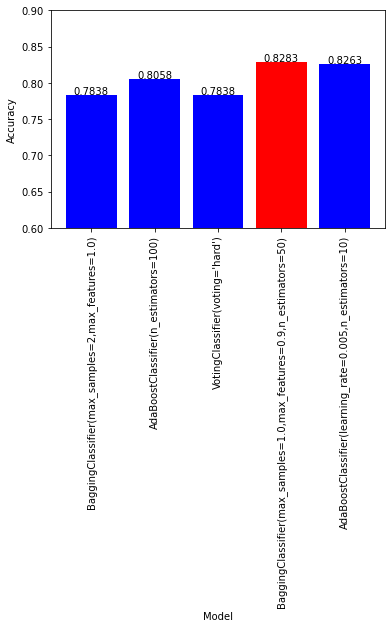

In [13]:
import matplotlib.pyplot as plt
models = np.array(['BaggingClassifier(max_samples=2,max_features=1.0)',
                   'AdaBoostClassifier(n_estimators=100)',
                   'VotingClassifier(voting=\'hard\')',
                   'BaggingClassifier(max_samples=1.0,max_features=0.9,n_estimators=50)',
                   'AdaBoostClassifier(learning_rate=0.005,n_estimators=10)'])
accuracy = np.array([0.7838,0.8058,0.7838, 0.8283, 0.8263])
colors = ['b', 'b', 'b', 'r', 'b']
plt.bar(models, accuracy, color=colors)
plt.xticks(np.arange(len(models)), models,rotation=90)
plt.ylim(0.6, 0.9)
plt.xlabel('Model')
plt.ylabel('Accuracy')
for i, v in enumerate(accuracy):
    plt.text(i, v+0.001, str(v), ha='center', fontsize=10)
plt.show()

## Output pickle saved model

In [14]:
pickle.dump(best_bagging, open('ensemble.sav', 'wb'))